# Technical Parameters

## Package loading

In [1]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


### Project name

In [2]:
name = 'obesity_classification'

### Thresholds & other parameters

In [3]:
problem_type = 'classification'

In [4]:
data_size = 'large'

In [5]:
threshold_NaN = 0.5

In [6]:
threshold_cat = 5

In [7]:
threshold_Z = 3.0

In [8]:
test_size = 0.2

In [9]:
threshold_entropy = 0.75

In [10]:
undersampling = False

In [11]:
undersampler = 'Random'

In [12]:
threshold_corr = 1.0

In [13]:
threshold_model = 5

In [14]:
threshold_score = 0.7

In [15]:
threshold_feature = 5

In [16]:
with_keras = False

In [17]:
CPU = False

In [18]:
time_dep = False

In [19]:
date_idx = 0

In [20]:
lag_number = 3

In [21]:
level_1_model = 'regression'

In [22]:
random_state = 42

### File & target

In [58]:
path = '/home/fifi/Documents/ezstacking/dataset/obesity.csv'

In [59]:
df = pd.read_csv(path)

In [60]:
target_col = 'NObeyesdad'

### Deployment

In [61]:
FastAPI_port = 8000

In [62]:
Docker_port = 80

# Exploratory Data Analysis (EDA)

## Drop user's columns & Duplicates

In [63]:
user_drop_cols = ['id', 'FAVC', 'SMOKE', 'SCC']

Dataset before deletion

In [64]:
display(df)

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 18 columns]

In [65]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [66]:
df = duplicates(df)

Number of rows before removing: 20758
Number of duplicate rows: 47
Number of rows after removing: 20711


Drop all the rows for which the target is NaN

In [67]:
df = df.dropna(subset=[target_col])

Dataset after deletion of user’s columns and duplicates

In [68]:
display(df)

Gender        Age    Height      Weight family_history_with_overweight  \
0        Male  24.443011  1.699998   81.669950                            yes   
1      Female  18.000000  1.560000   57.000000                            yes   
2      Female  18.000000  1.711460   50.165754                            yes   
3      Female  20.952737  1.710730  131.274851                            yes   
4        Male  31.641081  1.914186   93.798055                            yes   
...       ...        ...       ...         ...                            ...   
20753    Male  25.137087  1.766626  114.187096                            yes   
20754    Male  18.000000  1.710000   50.000000                             no   
20755    Male  20.101026  1.819557  105.580491                            yes   
20756    Male  33.852953  1.700000   83.520113                            yes   
20757    Male  26.680376  1.816547  118.134898                            yes   

           FCVC       NCP        CAEC      CH2O       FAF       TUE  \
0      2.000000  2.983297   Sometimes  2.763573  0.000000  0.976473   
1      2.000000  3.000000  Frequently  2.000000  1.000000  1.000000   
2      1.880534  1.411685   Sometimes  1.910378  0.866045  1.673584   
3      3.000000  3.000000   Sometimes  1.674061  1.467863  0.780199   
4      2.679664  1.971472   Sometimes  1.979848  1.967973  0.931721   
...         ...       ...         ...       ...       ...       ...   
20753  2.919584  3.000000   Sometimes  2.151809  1.330519  0.196680   
20754  3.000000  4.000000  Frequently  1.000000  2.000000  1.000000   
20755  2.407817  3.000000   Sometimes  2.000000  1.158040  1.198439   
20756  2.671238  1.971472   Sometimes  2.144838  0.000000  0.973834   
20757  3.000000  3.000000   Sometimes  2.003563  0.684487  0.713823   

            CALC                 MTRANS           NObeyesdad  
0      Sometimes  Public_Transportation  Overweight_Level_II  
1             no             Automobile        Normal_Weight  
2             no  Public_Transportation  Insufficient_Weight  
3      Sometimes  Public_Transportation     Obesity_Type_III  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
20753  Sometimes  Public_Transportation      Obesity_Type_II  
20754  Sometimes  Public_Transportation  Insufficient_Weight  
20755         no  Public_Transportation      Obesity_Type_II  
20756         no             Automobile  Overweight_Level_II  
20757  Sometimes  Public_Transportation      Obesity_Type_II  

[20711 rows x 14 columns]

### Dataset copy

In [69]:
df_copy = df.copy()

## Dataset Information

### Dataframe structure

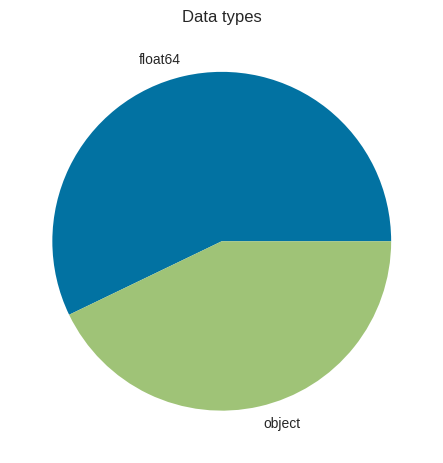

In [70]:
plot_dataframe_structure(df)

### Dataframe statistics

In [71]:
display(df.describe().T)

count       mean        std    min        25%        50%  \
Age     20711.0  23.849412   5.690242  14.00  20.000000  22.829681   
Height  20711.0   1.700390   0.087274   1.45   1.632118   1.700000   
Weight  20711.0  87.935797  26.376571  39.00  66.000000  84.210535   
FCVC    20711.0   2.446196   0.533236   1.00   2.000000   2.397280   
NCP     20711.0   2.762336   0.704414   1.00   3.000000   3.000000   
CH2O    20711.0   2.029437   0.608404   1.00   1.791803   2.000000   
FAF     20711.0   0.981850   0.838824   0.00   0.008013   1.000000   
TUE     20711.0   0.617142   0.602036   0.00   0.000000   0.573887   

               75%         max  
Age      26.000000   61.000000  
Height    1.762921    1.975663  
Weight  111.635463  165.057269  
FCVC      3.000000    3.000000  
NCP       3.000000    4.000000  
CH2O      2.549617    3.000000  
FAF       1.591375    3.000000  
TUE       1.000000    2.000000

## Which columns could be categorical ?

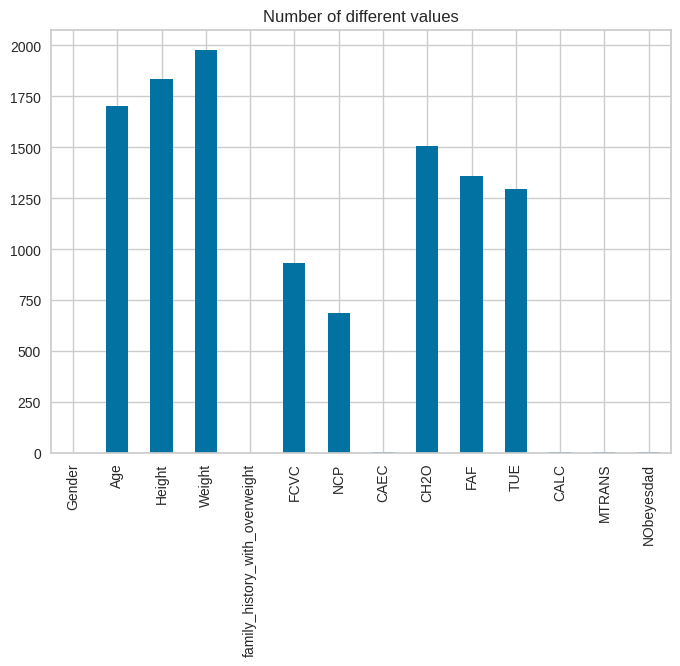

In [72]:
plot_categorical(df)

## Dataset Cleaning

### Drop NaN:

In [73]:
df, drop_cols = drop_na(df, target_col, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [74]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [75]:
display(dropped_cols)

array(['FAVC', 'SCC', 'SMOKE', 'id'], dtype='<U32')

### Encoding data:

In [76]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding object column: Gender
Encoding numeric column: Age
Encoding numeric column: Height
Encoding numeric column: Weight
Encoding object column: family_history_with_overweight
Encoding numeric column: FCVC
Encoding numeric column: NCP
Encoding object column: CAEC
Encoding numeric column: CH2O
Encoding numeric column: FAF
Encoding numeric column: TUE
Encoding object column: CALC
Encoding object column: MTRANS
Encoding object column: NObeyesdad


### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


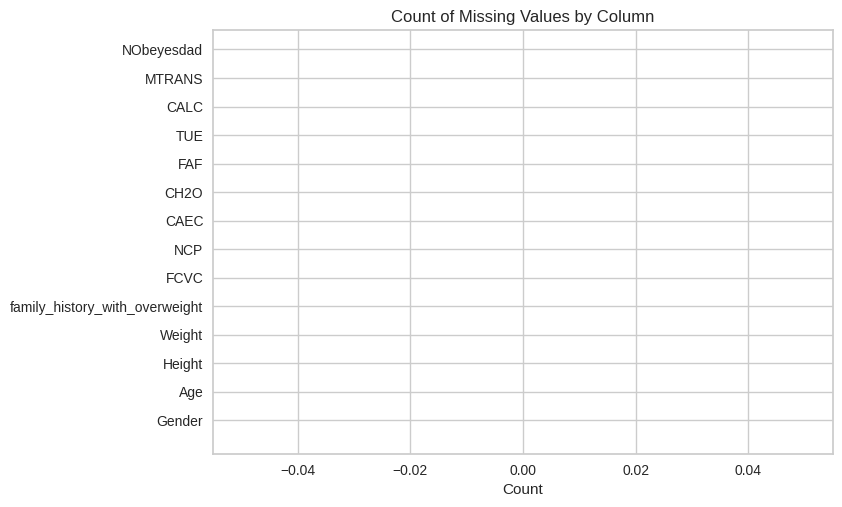

In [77]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

#### Imputation

In [78]:
df = imputation(df)

No need to impute data.


### Data compression:

In [79]:
df = downcast_dtypes(df)

Memory usage of dataframe is 1.90MB
Memory usage after optimization is: 0.59MB
Decreased by 68.8%


#### Dataframe structure after compression

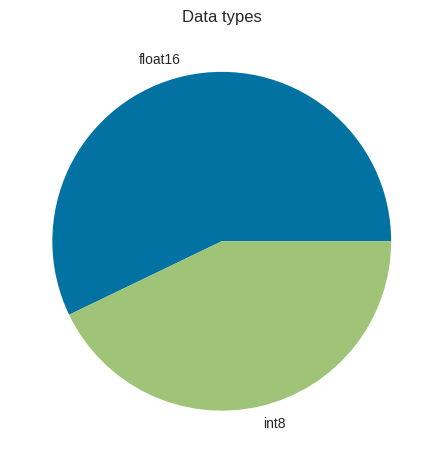

In [80]:
plot_dataframe_structure(df)

### Outliers:

In [81]:
df = outliers(df, threshold_Z)

Using Z_score,  1952  rows will be suppressed.


## Plottings

### Ranking 

#### Ranking 1D 

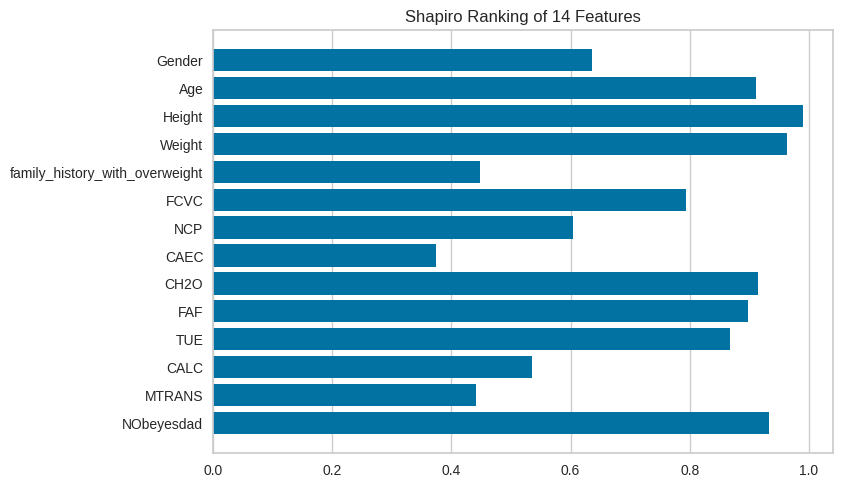

In [82]:
rank1d(df);

#### Ranking 2D 

##### Ranking 2D according to Pearson

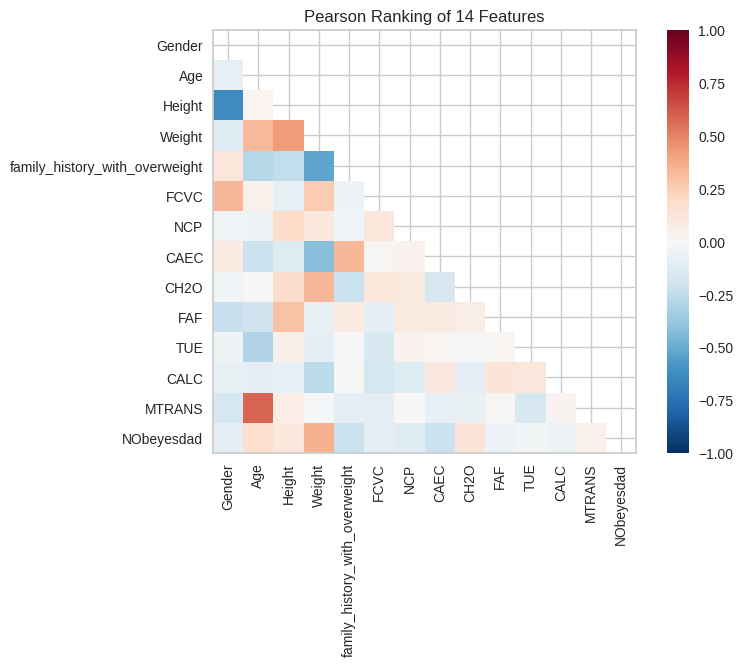

In [83]:
rank2d(df, algorithm='pearson');

##### Ranking 2D based on covariance

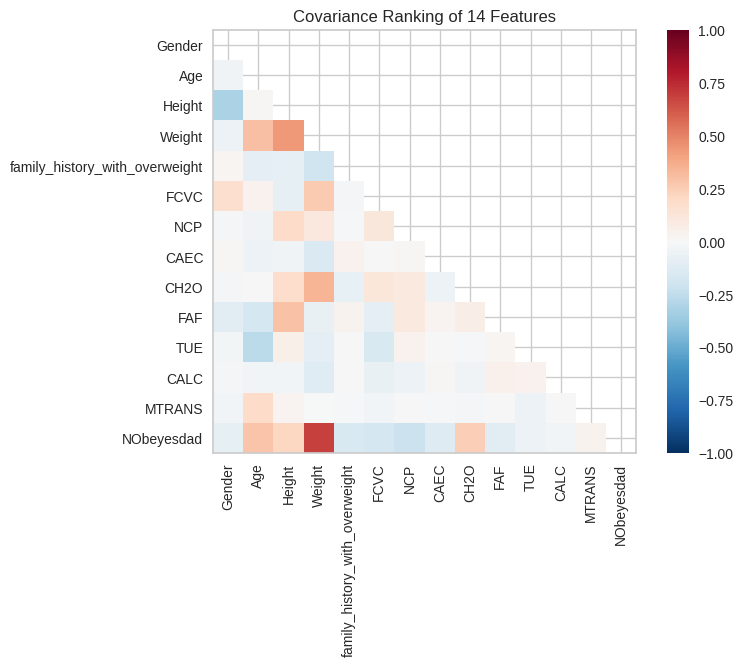

In [84]:
rank2d(df, algorithm='covariance');

##### Ranking 2D according to Spearman

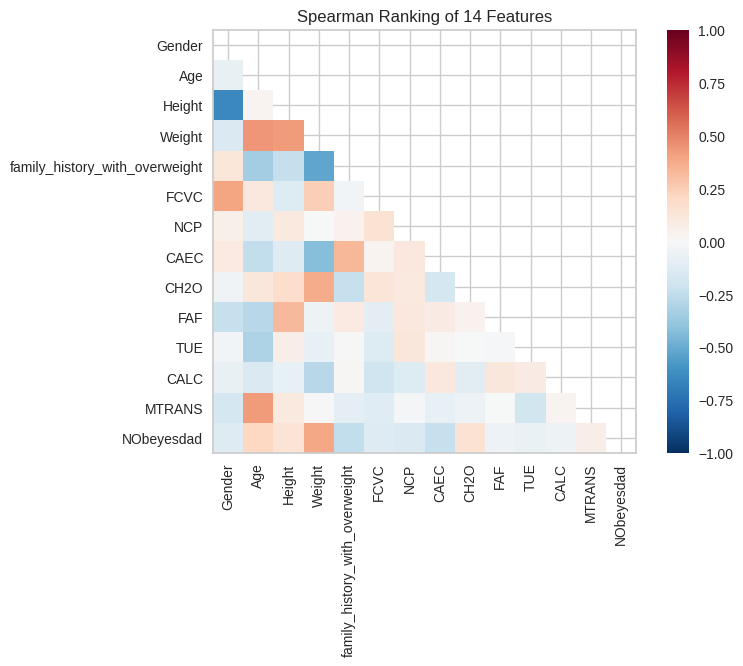

In [85]:
rank2d(df, algorithm='spearman');

##### Ranking 2D according to Kendalltau

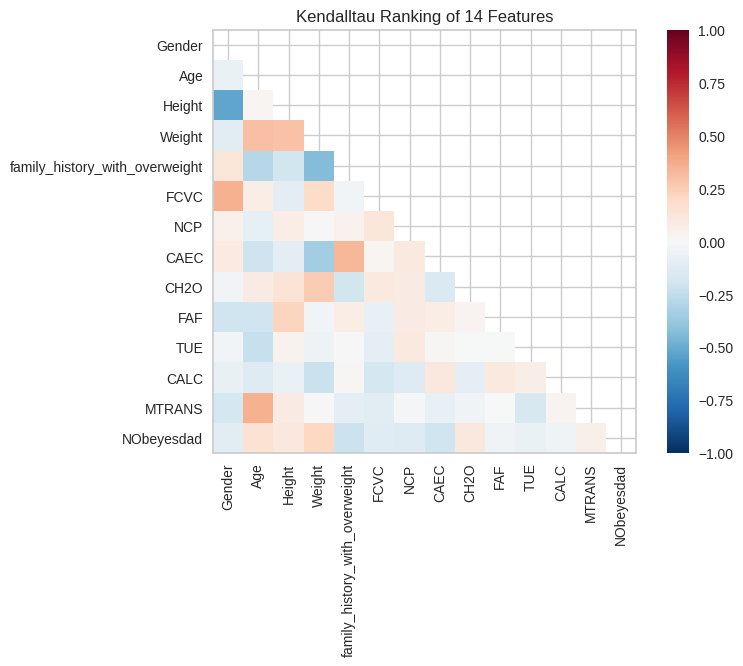

In [86]:
rank2d(df, algorithm='kendalltau');

### Correlation according to Pearson

In [87]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [88]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Check columns that should be dropped

In [89]:
print(dropped_cols)

[]


### Correlation according to Spearman (hierarchical clustering)

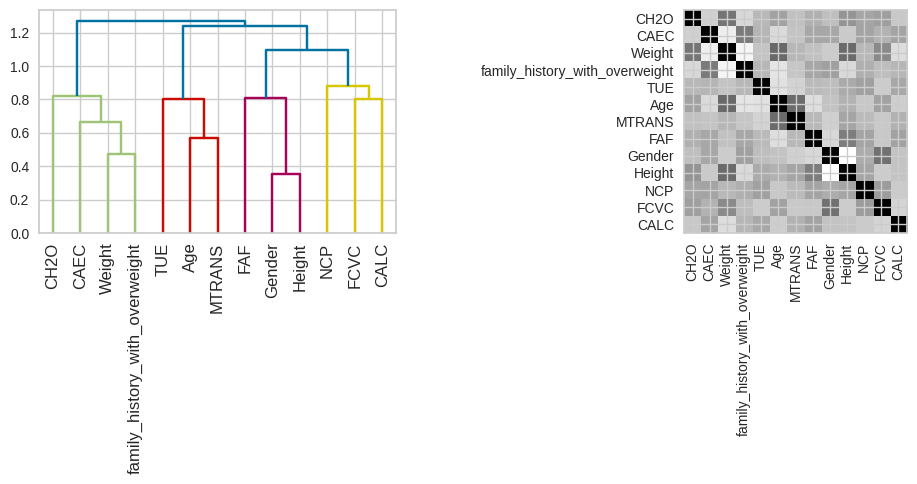

cluster_ids =  [3 2 3 1 1 4 4 1 1 3 2 4 2]
selected_features_names =  ['Gender', 'Age', 'Weight', 'FCVC']


In [90]:
selected_features_names = hierarchical_clustering(df.drop(target_col, axis=1), t=1) 
print('selected_features_names = ', selected_features_names)

### Correlation with Yellow Bricks

##### Splitting dataframe in features and targets

In [91]:
y = df[target_col]

In [92]:
X = df.drop(target_col, axis=1)

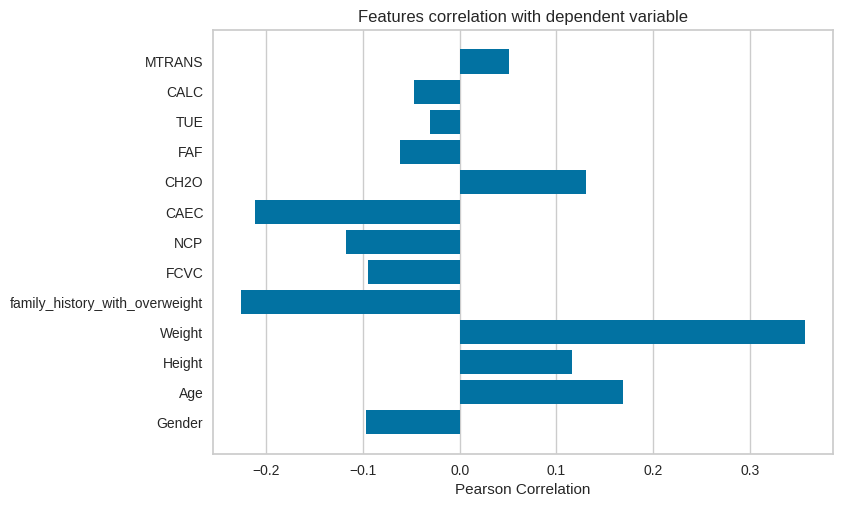

In [93]:
feature_correlation(X, y);

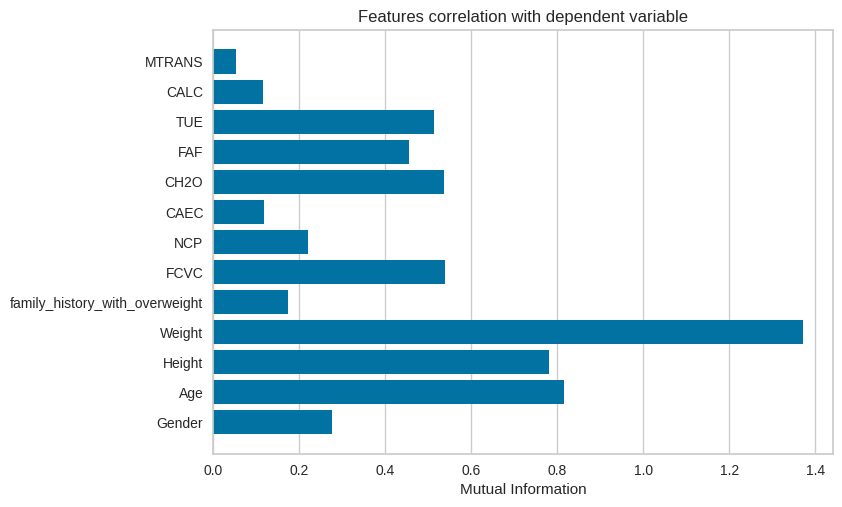

In [94]:
feature_correlation(X, y, method='mutual_info-classification');

### PCA

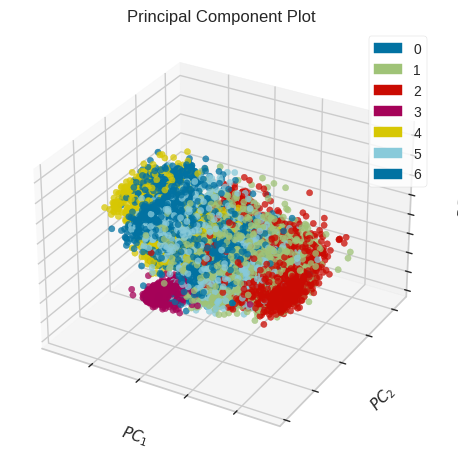

In [95]:
pca_decomposition(X, y.astype(int), projection=3);

### Class balancing

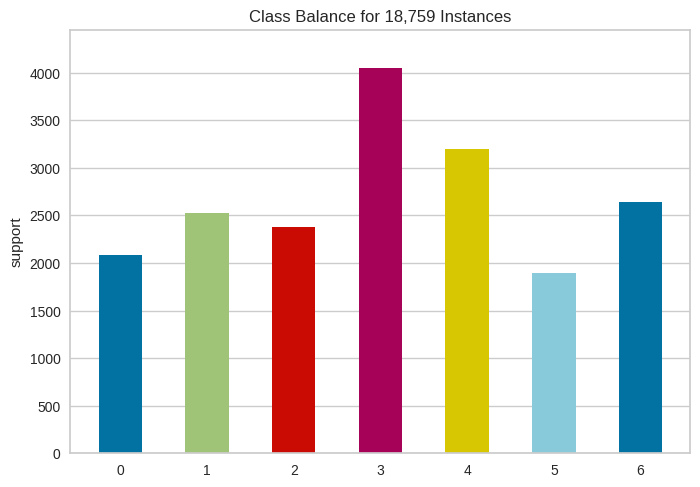

Entropy =  0.9844047692228066


In [96]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

# Splitting

In [97]:
df = df_copy

## Splitting dataframe in features and targets

In [98]:
y = df[target_col]

In [99]:
X = df.drop(target_col, axis=1)

### Dimensions

In [100]:
nb_features = len(X.columns.tolist())

In [101]:
nb_targets = len(y.unique())

In [102]:
layer_size = nb_features + nb_targets + 2

### Splitting data in train and test sets 

In [103]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling=undersampling, undersampler=undersampler, random_state=random_state)

### Encoding

In [104]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

# Modeling: Model selection

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [105]:
cat_selector, num_selector = get_features()

#### For models based on tree

In [106]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [107]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [108]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

#### For models not based on tree

In [109]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [110]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [111]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

#### Level-0 models

In [112]:
level_0 = [ 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True, random_state = random_state))), 
          ('SGDCH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='hinge', penalty='elasticnet', random_state = random_state))), 
          ('SGDCLL', make_pipeline(ntree_preprocessor, SGDClassifier(loss='log_loss', penalty='elasticnet', random_state = random_state))), 
          ('SGDCMH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='modified_huber', penalty='elasticnet', random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('GBC', make_pipeline(tree_preprocessor, GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state = random_state))), 
          ]

#### Level-1 model

In [113]:
level_1 = RidgeClassifier(alpha=1, positive=True, random_state = random_state)

#### Stacking for classification

In [114]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

## Model fitting

In [115]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

CPU times: user 4.74 s, sys: 1.99 s, total: 6.73 s
Wall time: 6min 40s


StackingClassifier(estimators=[('HGBC',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42))]),
                                                                                  1        Age
2     Height
3     Weight
5       FCVC
6        NCP
8       CH2O
9        FAF
10       TUE
Name: column_name, dtype: object),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(str...
                                                                                                  ('ordinalencoder',
                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                  unknown_value=-1))]),
                                                                                  0                             Gender
4     family_history_with_overweight
7                               CAEC
11                              CALC
12                            MTRANS
Name: column_name, dtype: object)])),
                                                ('gradientboostingclassifier',
                                                 GradientBoostingClassifier(learning_rate=1.0,
                                                                            random_state=42))]))],
                   final_estimator=RidgeClassifier(alpha=1, positive=True,
                                                   random_state=42),
                   n_jobs=-1)

## Model evaluation

### Model scoring

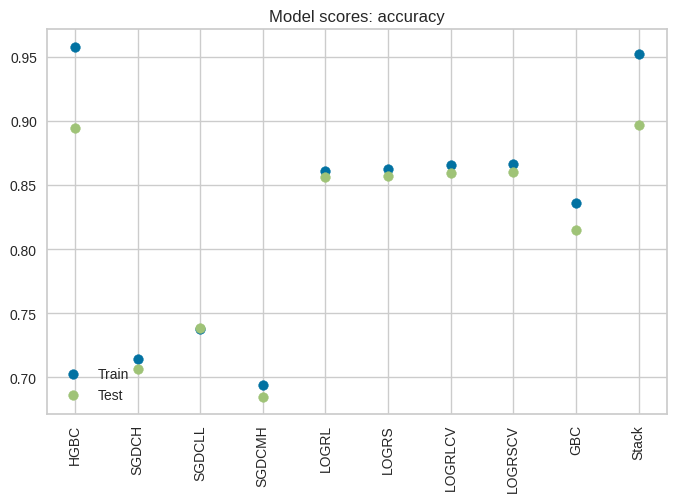

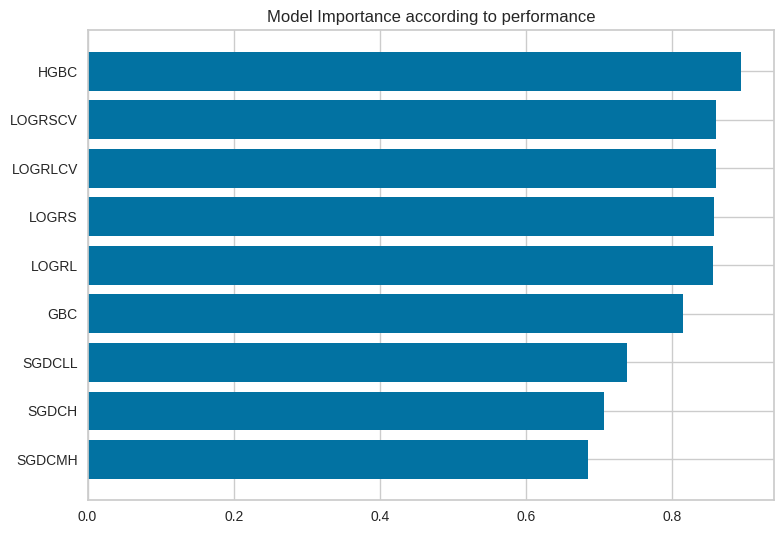

In [116]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### ROC/AUC

In [117]:
classes = y.unique()

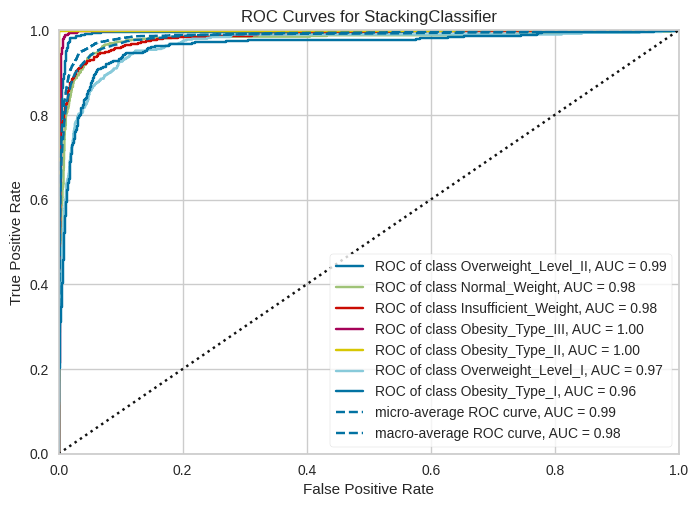

In [118]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

### Classification report

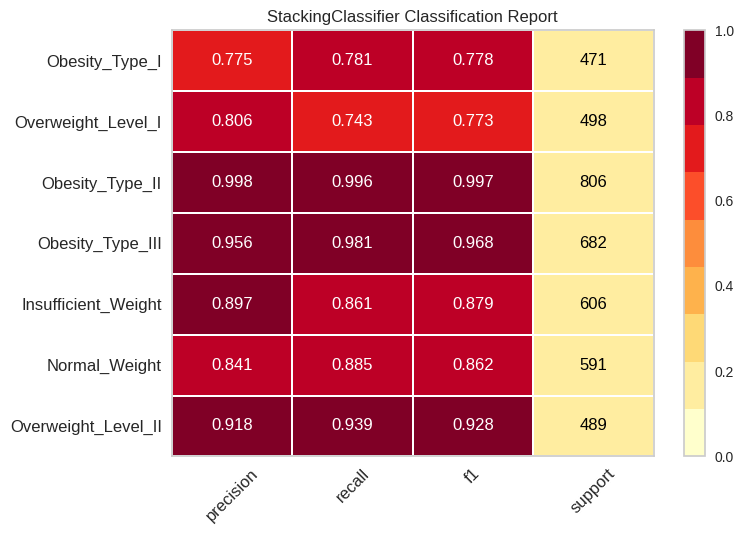

In [119]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Confusion matrix

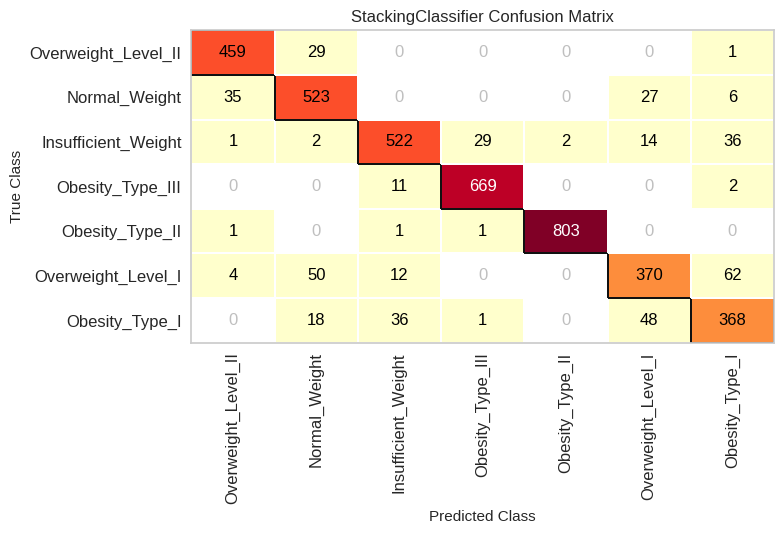

In [120]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Class prediction error

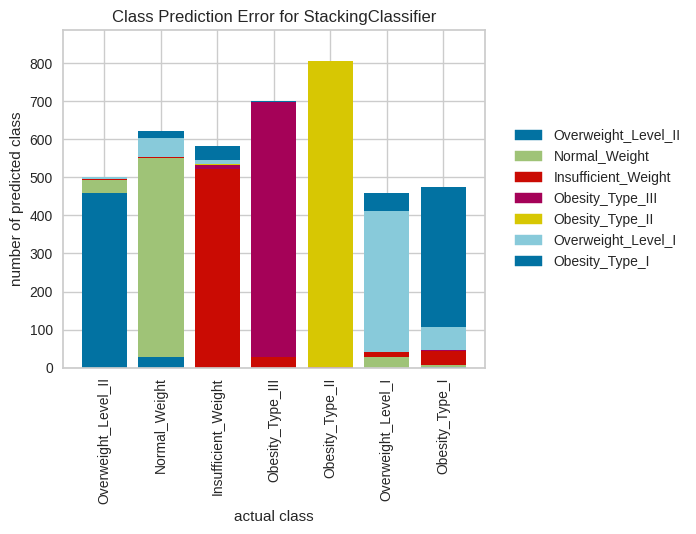

In [121]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Model inspection

### Model importance

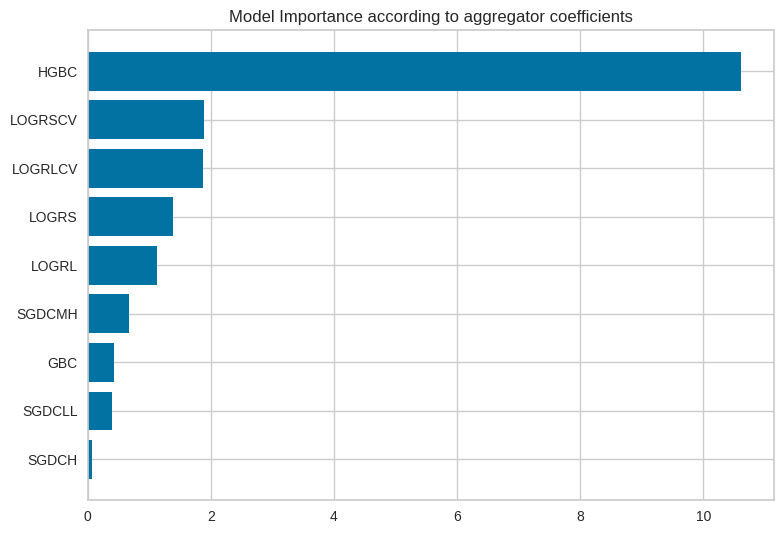

In [122]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

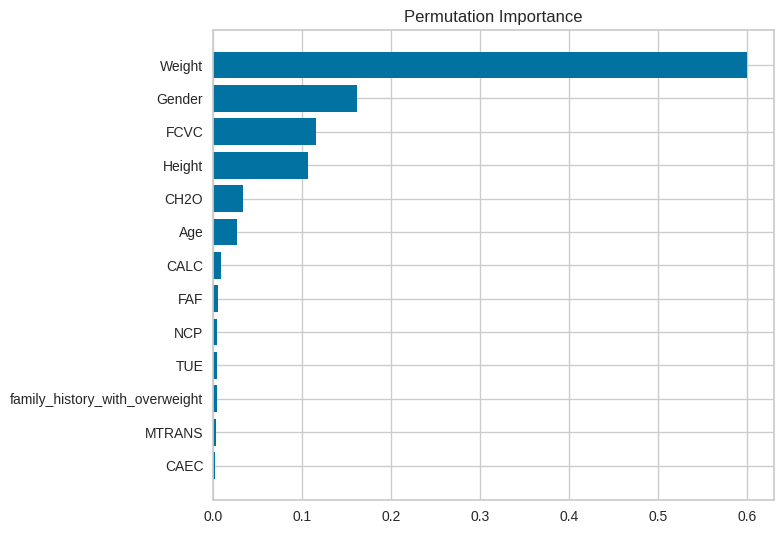

In [123]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Modeling: Feature selection

#### Filtered Level-0 models

In [124]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Build filtered model

In [125]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

## Filtered Model fitting

In [126]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

CPU times: user 1.29 s, sys: 749 ms, total: 2.04 s
Wall time: 6min 40s


StackingClassifier(estimators=[('HGBC',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42))]),
                                                                                  1        Age
2     Height
3     Weight
5       FCVC
6        NCP
8       CH2O
9        FAF
10       TUE
Name: column_name, dtype: object),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(str...
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  0                             Gender
4     family_history_with_overweight
7                               CAEC
11                              CALC
12                            MTRANS
Name: column_name, dtype: object)])),
                                                ('logisticregressioncv',
                                                 LogisticRegressionCV(cv=5,
                                                                      random_state=42,
                                                                      solver='saga'))]))],
                   final_estimator=RidgeClassifier(alpha=1, positive=True,
                                                   random_state=42),
                   n_jobs=-1)

## Filtered Model evaluation

### Filtered Model scoring

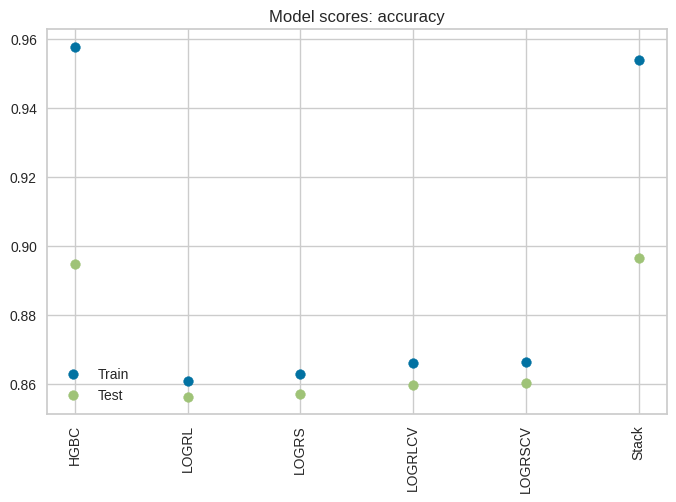

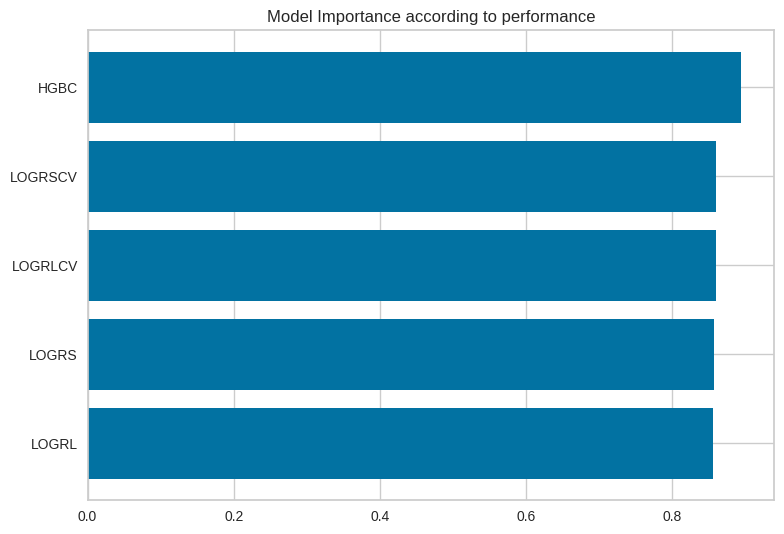

In [127]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered ROC/AUC

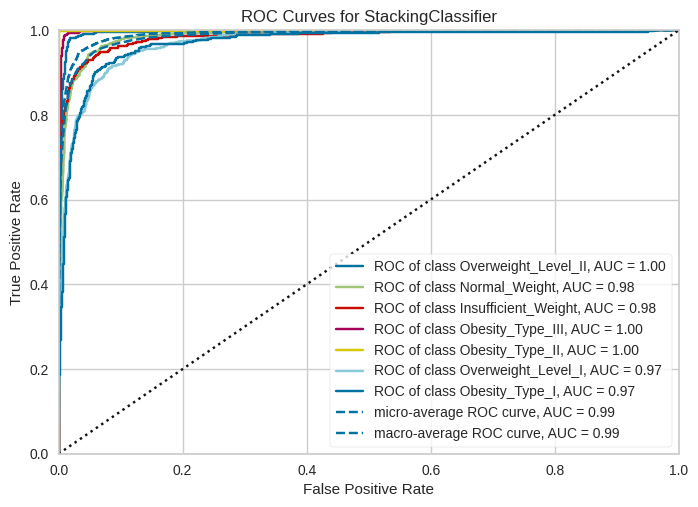

In [128]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

### Filtered Classification report

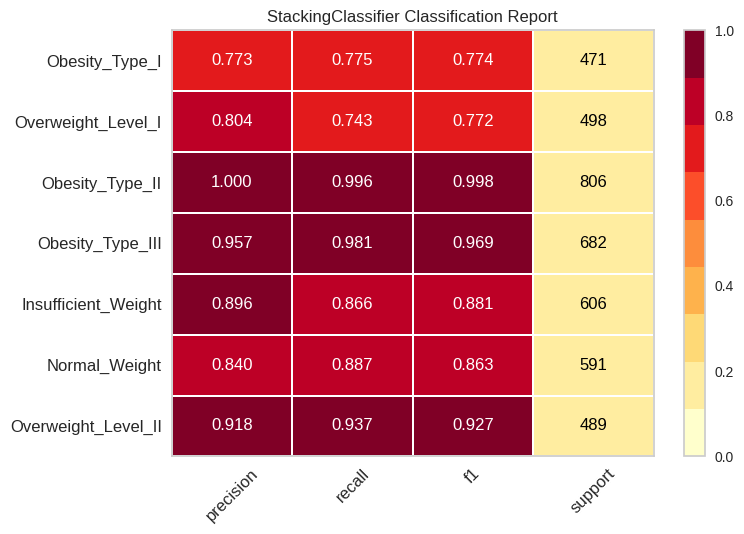

In [129]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Filtered Confusion matrix

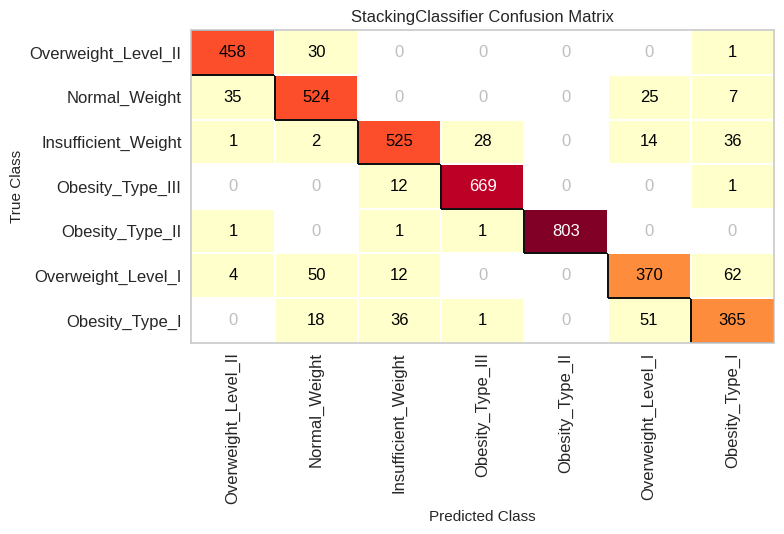

In [130]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Filtered Class prediction error

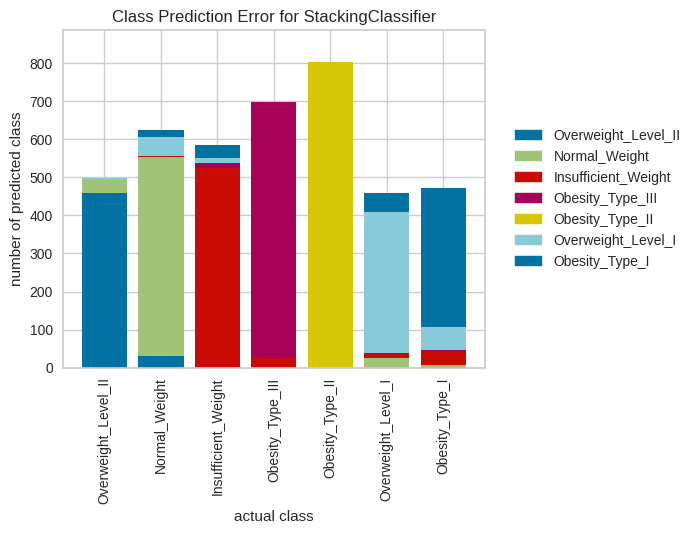

In [131]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Filtered Model inspection

### Filtered Model importance

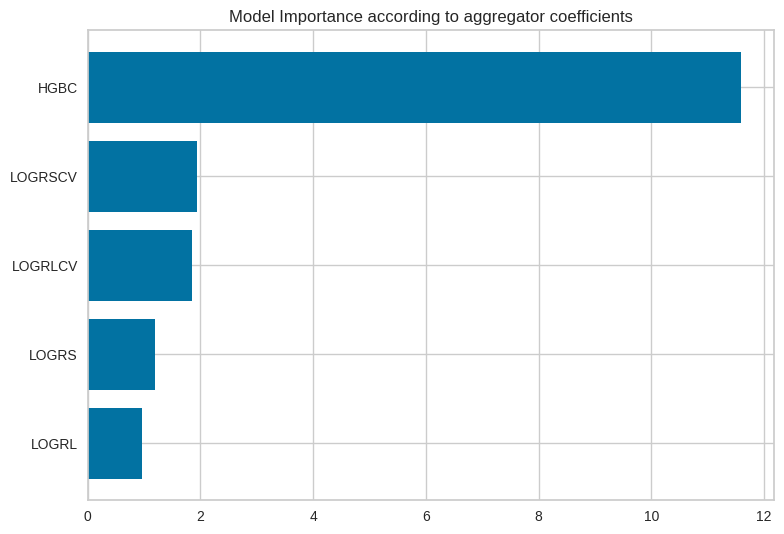

In [132]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

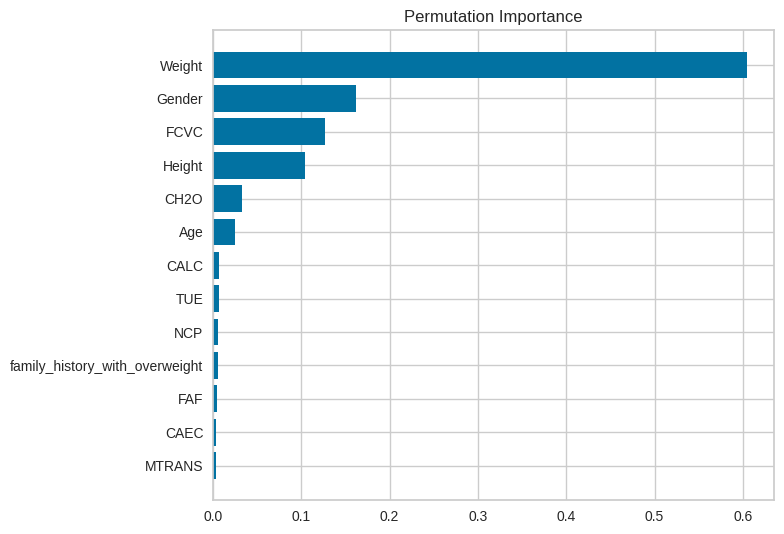

In [133]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [134]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [135]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [136]:
print(dropped_cols)

['Age', 'CAEC', 'CALC', 'FAF', 'MTRANS', 'NCP', 'TUE', 'family_history_with_overweight']


# Modeling: Final model

In [137]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [138]:
reduce_schema('column_name', dropped_cols)

## Splitting

### Splitting dataframe in features and targets

In [139]:
y = df[target_col] 

In [140]:
X = df.drop(target_col, axis=1) 

### Dimensions

In [141]:
nb_features = len(X.columns.tolist()) 

In [142]:
nb_targets = len(y.unique()) 

In [143]:
layer_size = nb_features + nb_targets + 2 

### Splitting data in train and test sets 

In [144]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

### Encoding

In [145]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test)) 

## Final model building

#### Select the categorical and numerical columns

In [146]:
cat_selector, num_selector = get_features() 

#### For models based on tree

In [147]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 

In [148]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True)) 

In [149]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)) 

#### For models not based on tree

In [150]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 

In [151]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler()) 

In [152]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)) 

#### Final level-0 models

In [153]:
level_0 = [ 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True, random_state = random_state))), 
          ('SGDCH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='hinge', penalty='elasticnet', random_state = random_state))), 
          ('SGDCLL', make_pipeline(ntree_preprocessor, SGDClassifier(loss='log_loss', penalty='elasticnet', random_state = random_state))), 
          ('SGDCMH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='modified_huber', penalty='elasticnet', random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('GBC', make_pipeline(tree_preprocessor, GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state = random_state))), 
          ]

In [154]:
level_0_f = list(set(level_0) & set(model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)))

#### Build the final model

In [155]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

## Final Model fitting

In [156]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-pack

CPU times: user 1.03 s, sys: 490 ms, total: 1.52 s
Wall time: 2min 10s


StackingClassifier(estimators=[('LOGRSCV',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                                  1    Height
2    Weight
3      FCVC
4      CH2O
Name: column_name, dtype: object),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimpu...
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  0    Gender
Name: column_name, dtype: object)])),
                                                ('logisticregression',
                                                 LogisticRegression(random_state=42))]))],
                   final_estimator=RidgeClassifier(alpha=1, positive=True,
                                                   random_state=42),
                   n_jobs=-1)

## Final Model evaluation

### Final Model scoring

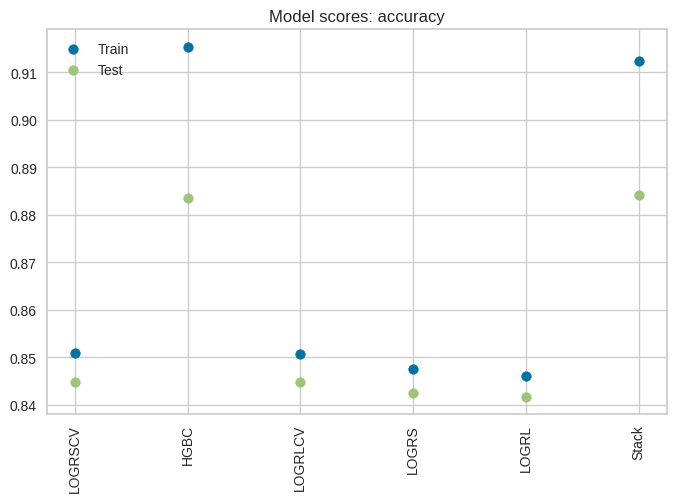

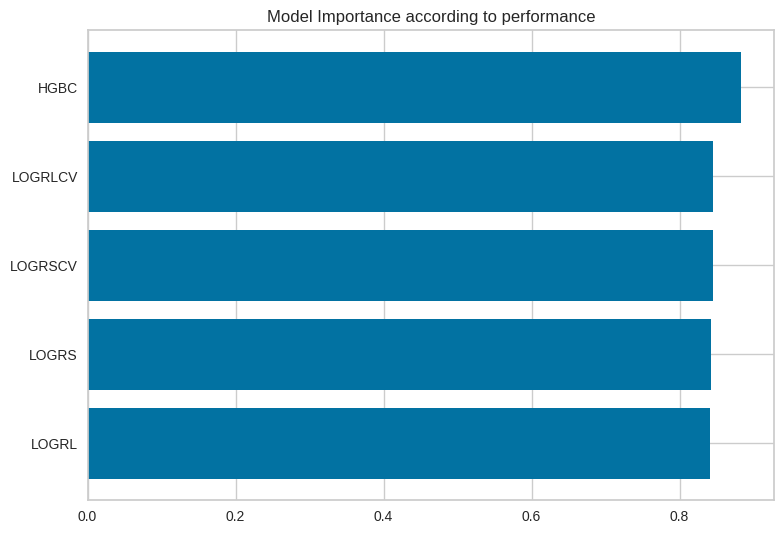

In [157]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

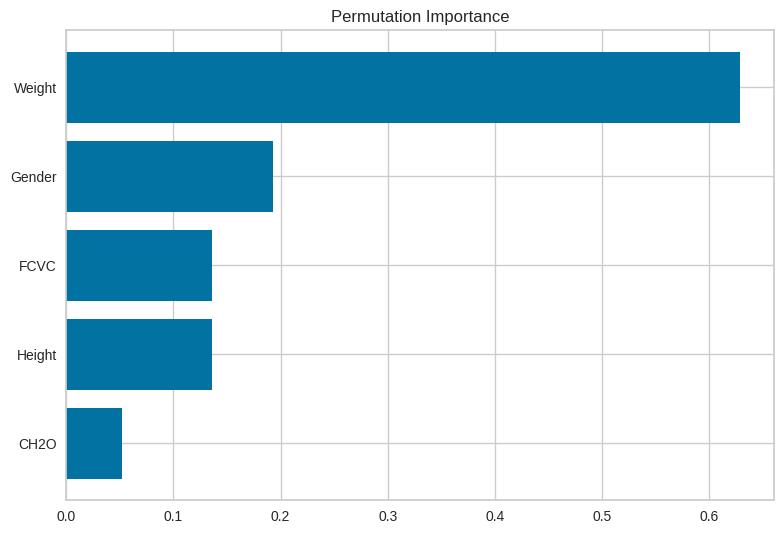

In [158]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

### Final feature elimination

In [159]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final ROC/AUC

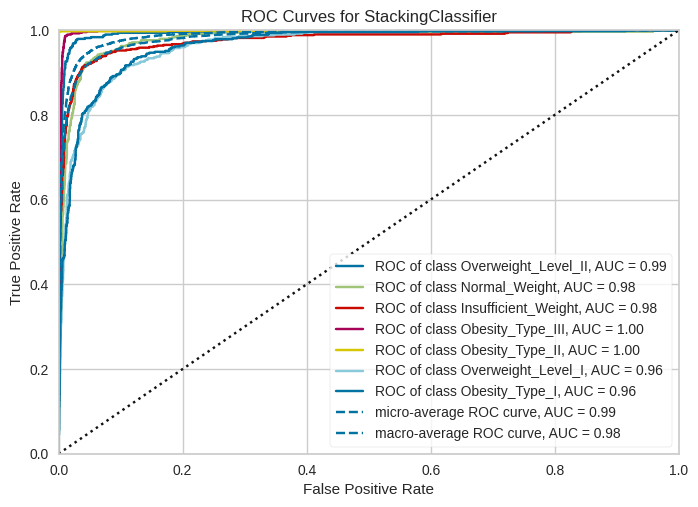

In [160]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

### Final Classification report

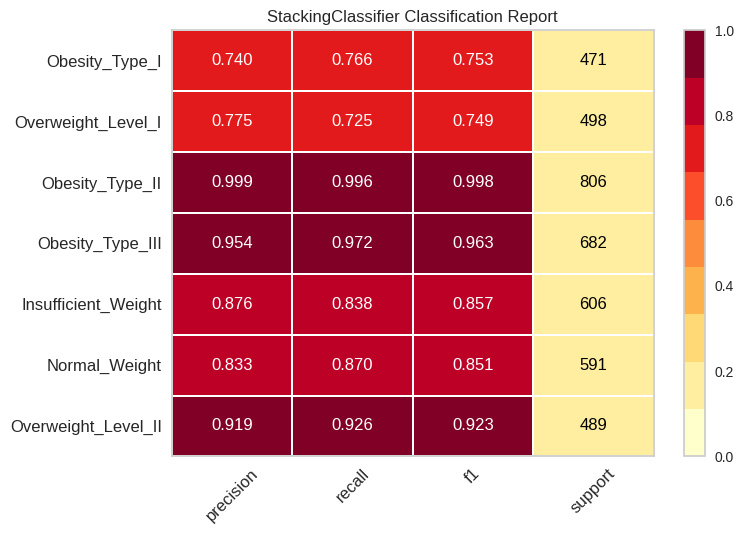

In [161]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Final Confusion matrix

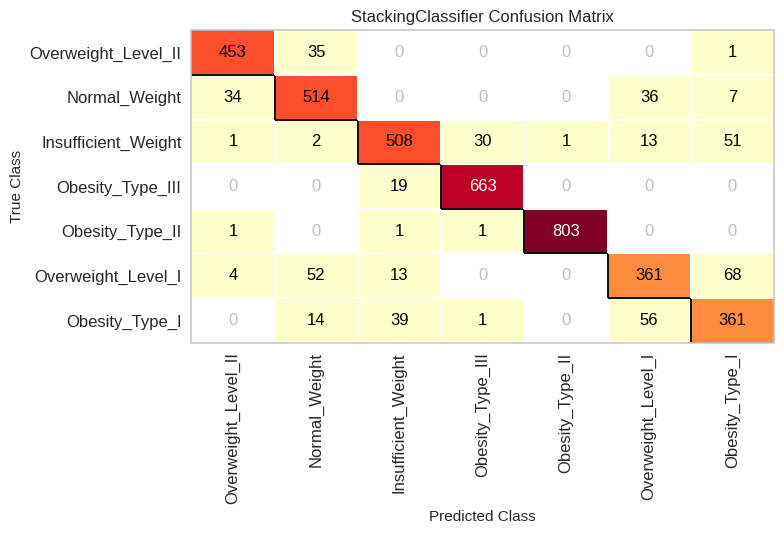

In [162]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Final Class prediction error

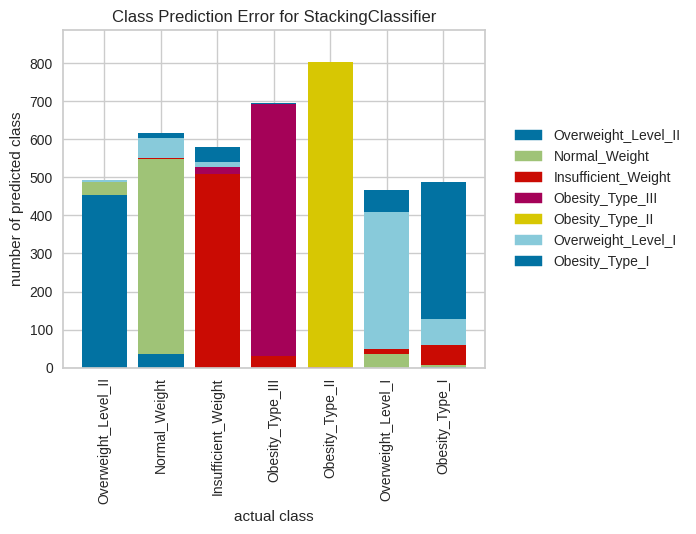

In [163]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Final Model inspection

### Final Model importance

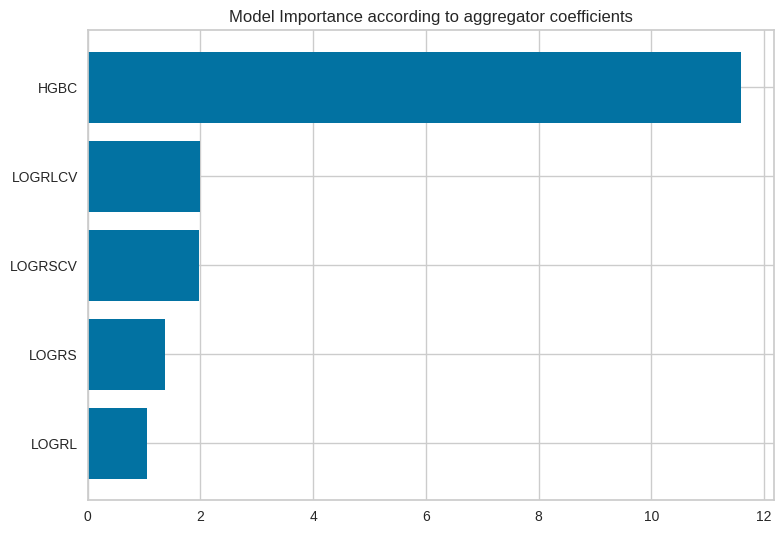

In [164]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

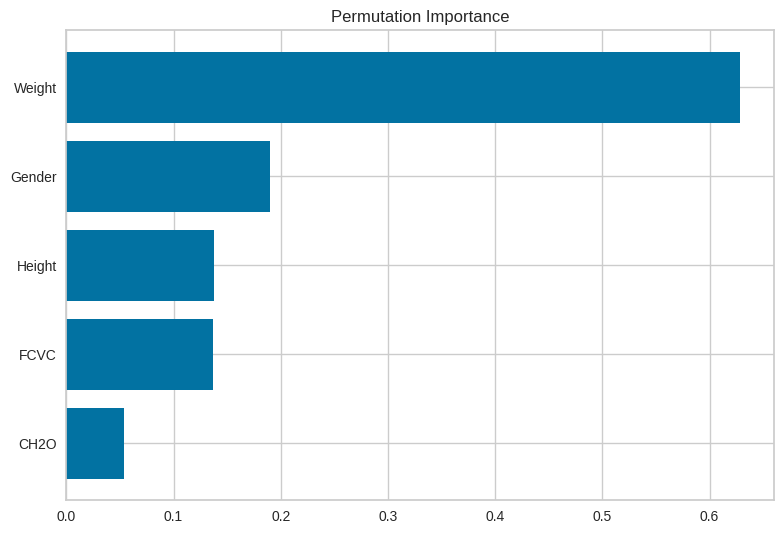

array([['CH2O', 0.05353608496258753],
       ['FCVC', 0.13673666425295683],
       ['Height', 0.1373159546222545],
       ['Gender', 0.19029688631426503],
       ['Weight', 0.6286990103789525]], dtype=object)

In [165]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [166]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU, target_encoder=target_encoder)

interactive(children=(Dropdown(description='feature', options=('Gender', 'Height', 'Weight', 'FCVC', 'CH2O'), …

# Test & Deployment

### Save the model

In [167]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate the server

In [168]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port, with_keras)

### [Test the API](./server.ipynb)

### Docker

In [169]:
dockerize(name, model, model_name, X, y, Docker_port, with_keras)